In [5]:
import pandas as pd
import numpy as np

np.random.seed(42)

parties = ["DMK", "AIADMK", "TVK"]
sources = [
    "India Today survey",
    "ThePrint survey",
    "OneIndia online poll",
    "YouTube news poll",
    "Facebook poll",
    "Political analyst estimate"
]

data = []

for i in range(50):
    party = np.random.choice(parties)
    
    if party == "DMK":
        vote = np.random.normal(33, 3)   # DMK strong base
    elif party == "AIADMK":
        vote = np.random.normal(26, 3)   # AIADMK mid range
    else:  # TVK
        vote = np.random.normal(30, 8)   # TVK volatile (online heavy)
    
    source = np.random.choice(sources)
    
    data.append({
        "party": party,
        "vote_pct": round(max(1, min(vote, 90)), 2),
        "source": source
    })

df = pd.DataFrame(data)
df


,party,vote_pct,source
0,TVK,25.60,Facebook poll
1,DMK,34.55,ThePrint survey
2,TVK,29.24,Facebook poll
3,TVK,22.57,Political analyst estimate
4,DMK,31.26,Facebook poll
5,DMK,31.42,YouTube news poll
6,AIADMK,18.16,India Today survey
7,TVK,37.60,OneIndia online poll
8,TVK,26.58,Political analyst estimate
9,AIADMK,23.77,Political analyst estimate


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
party_encoded = encoder.fit_transform(df[["party"]])

party_df = pd.DataFrame(
    party_encoded,
    columns=encoder.get_feature_names_out(["party"])
)

X = party_df
y = df["vote_pct"]


/home/raise/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X, y)


RandomForestRegressor(n_estimators=300, random_state=42)

In [8]:
party_predict = pd.DataFrame({
    "party": ["DMK", "AIADMK", "TVK"]
})
X = party_df

party_encoded_pred = encoder.transform(party_predict[["party"]])
pred_votes = model.predict(party_encoded_pred)

result = pd.DataFrame({
    "party": ["DMK", "AIADMK", "TVK"],
    "predicted_vote_pct": pred_votes
})

# Normalize to 100%
result["predicted_vote_pct"] = (
    result["predicted_vote_pct"] /
    result["predicted_vote_pct"].sum()
) * 100

result.round(2)


/home/raise/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,party,predicted_vote_pct
0,DMK,37.55
1,AIADMK,28.03
2,TVK,34.42


/home/raise/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


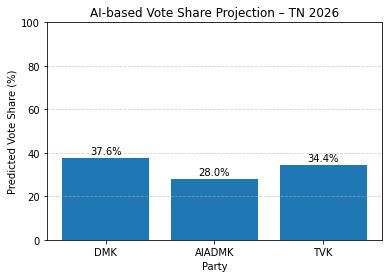

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

bars = plt.bar(
    result["party"],
    result["predicted_vote_pct"]
)

plt.xlabel("Party")
plt.ylabel("Predicted Vote Share (%)")
plt.title("AI-based Vote Share Projection – TN 2026")

plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 🔹 ADD VALUE LABELS ON TOP OF BARS
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()
